# 数据导入 (Data Import)

In [1]:
import numpy as np 
import pandas as pd 
import datetime
import matplotlib.pyplot as plt
import seaborn as sns 
import time
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
%matplotlib inline

# Set to Max as there're too many columns in dateset
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


# Import data for differentiation
df_train = pd.read_csv('data\PPDtrain.csv')
df_test = pd.read_csv('data\PPDtest.csv')

df_test['ListingInfo'] = pd.to_datetime(df_test['ListingInfo'])
df_test['cal_month'] = df_test['ListingInfo'].dt.month
df_test['cal_weekday'] = df_test['ListingInfo'].dt.dayofweek+1
df_test['cal_year'] = df_test['ListingInfo'].dt.year
df_test['cal_period'] = (df_test['ListingInfo'].dt.day/16).astype(int)

df_train['ListingInfo'] = pd.to_datetime(df_train['ListingInfo'])
df_train['cal_month'] = df_train['ListingInfo'].dt.month
df_train['cal_weekday'] = df_train['ListingInfo'].dt.dayofweek+1
df_train['cal_year'] = df_train['ListingInfo'].dt.year
df_train['cal_period'] = (df_train['ListingInfo'].dt.day/16).astype(int)

#Replace '-1' with nan, as there're too many '-1', denoise meaningless values
df_train=df_train.replace({-1:np.nan})
df_test=df_test.replace({-1:np.nan})
#Replace 'buxiang' with nan
df_train=df_train.replace({'buxiang':np.nan})
df_test=df_test.replace({'buxiang':np.nan})

with open('data\city.txt','r',encoding='utf-8') as f:
    dic=[]
    for line in f.readlines():
        line=line.strip('\n') #去掉换行符\n
        b=line.split(' ') #将每一行以空格为分隔符转换成列表
        dic.append(b)
city = dict()
for i in range(len(dic)):
    city.update({dic[i][0]:dic[i][1]})
    
def drop_province_suffix(df,col):
    #list = df[col].unique()
    df[col] = [a[:-5] if a.find('sheng')!= -1 else a[:] for a in df[col]]
    df[col] = [a[:-3] if a.find('shi')!= -1 else a[:] for a in df[col]]
    df[col] = [a[:-7] if a.find('zizhiqu')!= -1 else a[:] for a in df[col]]
    df[col] = [a[:-8] if a.find('zhuangzu')!= -1 else a[:] for a in df[col]]
    df[col] = [a[:-5] if a.find('huizu')!= -1 else a[:] for a in df[col]]
    df[col] = [a[:-7] if a.find('weiwuer')!= -1 else a[:] for a in df[col]]

drop_province_suffix(df_train,'UserInfo_19_pinyin')
drop_province_suffix(df_test,'UserInfo_19_pinyin')    

def get_badrate(df,col):
    group = df.groupby(col)
    df=pd.DataFrame()
    #df[col] = group
    df['total'] = group.target.count()
    df['bad'] = group.target.sum()
    df['badrate'] = round(df['bad']/df['total'],4)
    #df.reset_index()
    return df.sort_values('badrate',ascending=False)

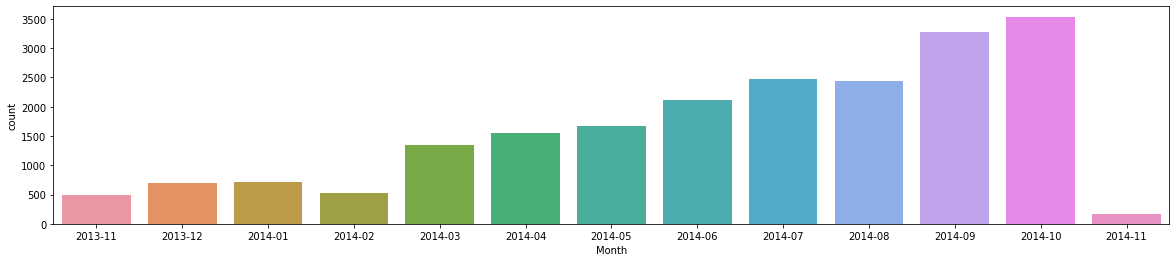

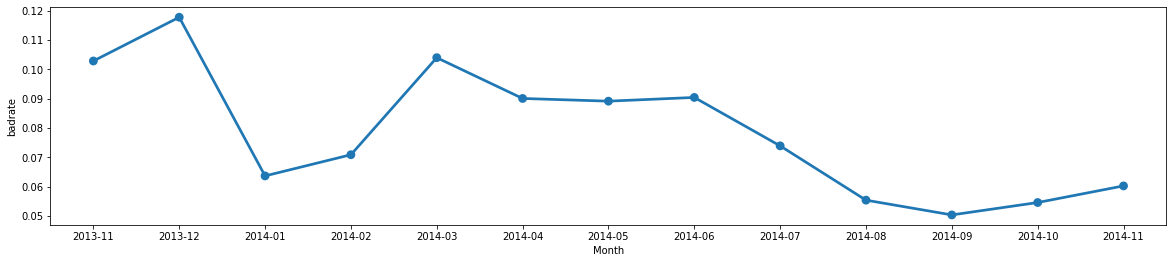

In [2]:
df_train['ListingInfo'] = pd.to_datetime(df_train.ListingInfo)
df_train["Month"] = df_train.ListingInfo.apply(lambda x:datetime.datetime.strftime(x,"%Y-%m"))
 
plt.figure(figsize=(20,4))
sns.countplot(data=df_train.sort_values('Month'),x='Month')
plt.show()

month_group = df_train.groupby('Month')
df_badrate_month = pd.DataFrame()
df_badrate_month['total'] = month_group.target.count()
df_badrate_month['bad'] = month_group.target.sum()
df_badrate_month['badrate'] = df_badrate_month['bad']/df_badrate_month['total']
df_badrate_month=df_badrate_month.reset_index()
 
 
plt.figure(figsize=(20,4))
sns.pointplot(data=df_badrate_month,x='Month',y='badrate',linestyles='-')
plt.show()

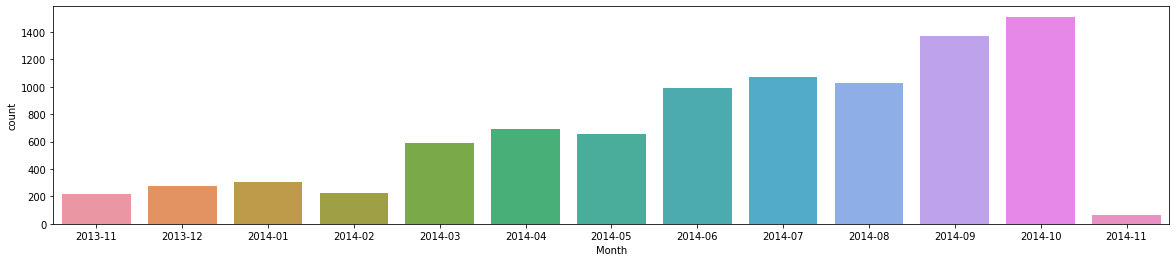

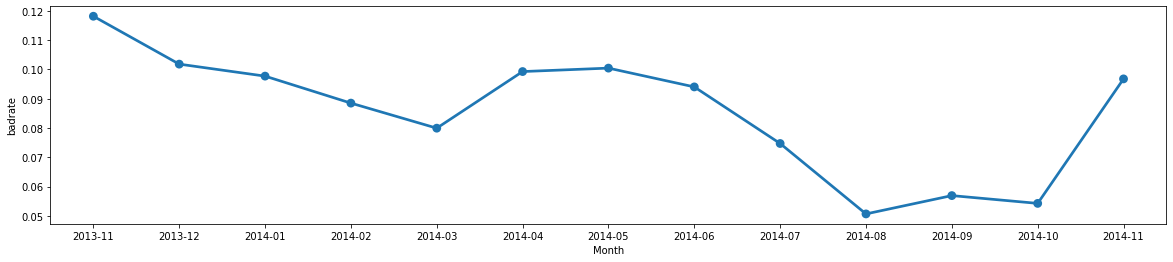

In [3]:
df_test['ListingInfo'] = pd.to_datetime(df_test.ListingInfo)
df_test["Month"] = df_test.ListingInfo.apply(lambda x:datetime.datetime.strftime(x,"%Y-%m"))
 
plt.figure(figsize=(20,4))
sns.countplot(data=df_test.sort_values('Month'),x='Month')
plt.show()

month_group = df_test.groupby('Month')
df_badrate_month = pd.DataFrame()
df_badrate_month['total'] = month_group.target.count()
df_badrate_month['bad'] = month_group.target.sum()
df_badrate_month['badrate'] = df_badrate_month['bad']/df_badrate_month['total']
df_badrate_month=df_badrate_month.reset_index()
 
 
plt.figure(figsize=(20,4))
sns.pointplot(data=df_badrate_month,x='Month',y='badrate',linestyles='-')
plt.show()

In [4]:
df_u_19_bad_rate_train = get_badrate(df_train,'UserInfo_19_pinyin')
df_u_19_bad_rate_test = get_badrate(df_train,'UserInfo_19_pinyin')

In [5]:
df_cred7 = pd.read_csv('data\credit_7.csv')
df_cred19 = pd.read_csv('data\credit_19.csv')

df_cred7.rename(columns=
                {"UserInfo_19_pinyin":"UserInfo_7_pinyin",
                 "total": "Cred_7_total",
                 "bad":"Cred_7_bad",
                 "badrate":"Cred_7_rate"},
                inplace=True)
df_cred19.rename(columns=
                {"UserInfo_7_pinyin":"UserInfo_19_pinyin",
                "total": "Cred_19_total",
                 "bad":"Cred_19_bad",
                 "badrate":"Cred_19_rate"},
                inplace=True)

# df_test = pd.merge(df_test,df_cred7,on='UserInfo_7_pinyin',how='left')
# df_train = pd.merge(df_train,df_cred7,on='UserInfo_7_pinyin',how='left')
# df_test = pd.merge(df_test,df_cred19,on='UserInfo_19_pinyin',how='left')
# df_train = pd.merge(df_train,df_cred19,on='UserInfo_19_pinyin',how='left')

df_train.drop(['ListingInfo','Month'],axis=1,inplace=True)
df_test.drop(['ListingInfo','Month'],axis=1,inplace=True)

In [6]:
df_test.head()

,UserInfo_1,UserInfo_2_pinyin,UserInfo_3,UserInfo_4_pinyin,WeblogInfo_1,WeblogInfo_2,WeblogInfo_3,WeblogInfo_4,WeblogInfo_5,WeblogInfo_6,WeblogInfo_7,WeblogInfo_8,WeblogInfo_9,WeblogInfo_10,WeblogInfo_11,WeblogInfo_12,WeblogInfo_13,WeblogInfo_14,WeblogInfo_15,WeblogInfo_16,WeblogInfo_17,WeblogInfo_18,UserInfo_5,UserInfo_6,UserInfo_7_pinyin,UserInfo_8_pinyin,UserInfo_9_pinyin,UserInfo_10,UserInfo_11,UserInfo_12,UserInfo_13,UserInfo_14,UserInfo_15,UserInfo_16,UserInfo_17,UserInfo_18,UserInfo_19_pinyin,UserInfo_20_pinyin,UserInfo_21,UserInfo_22_pinyin,UserInfo_23,UserInfo_24_pinyin,Education_Info1,Education_Info2,Education_Info3,Education_Info4,Education_Info5,Education_Info6,Education_Info7,Education_Info8,WeblogInfo_19,WeblogInfo_20,WeblogInfo_21,WeblogInfo_23,WeblogInfo_24,WeblogInfo_25,WeblogInfo_26,WeblogInfo_27,WeblogInfo_28,WeblogInfo_29,WeblogInfo_30,WeblogInfo_31,WeblogInfo_32,WeblogInfo_33,WeblogInfo_34,WeblogInfo_35,WeblogInfo_36,WeblogInfo_37,WeblogInfo_38,WeblogInfo_39,WeblogInfo_40,WeblogInfo_41,WeblogInfo_42,WeblogInfo_43,WeblogInfo_44,WeblogInfo_45,WeblogInfo_46,WeblogInfo_47,WeblogInfo_48,WeblogInfo_49,WeblogInfo_50,WeblogInfo_51,WeblogInfo_52,WeblogInfo_53,WeblogInfo_54,WeblogInfo_55,WeblogInfo_56,WeblogInfo_57,WeblogInfo_58,ThirdParty_Info_Period1_1,ThirdParty_Info_Period1_2,ThirdParty_Info_Period1_3,ThirdParty_Info_Period1_4,ThirdParty_Info_Period1_5,ThirdParty_Info_Period1_6,ThirdParty_Info_Period1_7,ThirdParty_Info_Period1_8,ThirdParty_Info_Period1_9,ThirdParty_Info_Period1_10,ThirdParty_Info_Period1_11,ThirdParty_Info_Period1_12,ThirdParty_Info_Period1_13,ThirdParty_Info_Period1_14,ThirdParty_Info_Period1_15,ThirdParty_Info_Period1_16,ThirdParty_Info_Period1_17,ThirdParty_Info_Period2_1,ThirdParty_Info_Period2_2,ThirdParty_Info_Period2_3,ThirdParty_Info_Period2_4,ThirdParty_Info_Period2_5,ThirdParty_Info_Period2_6,ThirdParty_Info_Period2_7,ThirdParty_Info_Period2_8,ThirdParty_Info_Period2_9,ThirdParty_Info_Period2_10,ThirdParty_Info_Period2_11,ThirdParty_Info_Period2_12,ThirdParty_Info_Period2_13,ThirdParty_Info_Period2_14,ThirdParty_Info_Period2_15,ThirdParty_Info_Period2_16,ThirdParty_Info_Period2_17,ThirdParty_Info_Period3_1,ThirdParty_Info_Period3_2,ThirdParty_Info_Period3_3,ThirdParty_Info_Period3_4,ThirdParty_Info_Period3_5,ThirdParty_Info_Period3_6,ThirdParty_Info_Period3_7,ThirdParty_Info_Period3_8,ThirdParty_Info_Period3_9,ThirdParty_Info_Period3_10,ThirdParty_Info_Period3_11,ThirdParty_Info_Period3_12,ThirdParty_Info_Period3_13,ThirdParty_Info_Period3_14,ThirdParty_Info_Period3_15,ThirdParty_Info_Period3_16,ThirdParty_Info_Period3_17,ThirdParty_Info_Period4_1,ThirdParty_Info_Period4_2,ThirdParty_Info_Period4_3,ThirdParty_Info_Period4_4,ThirdParty_Info_Period4_5,ThirdParty_Info_Period4_6,ThirdParty_Info_Period4_7,ThirdParty_Info_Period4_8,ThirdParty_Info_Period4_9,ThirdParty_Info_Period4_10,ThirdParty_Info_Period4_11,ThirdParty_Info_Period4_12,ThirdParty_Info_Period4_13,ThirdParty_Info_Period4_14,ThirdParty_Info_Period4_15,ThirdParty_Info_Period4_16,ThirdParty_Info_Period4_17,ThirdParty_Info_Period5_1,ThirdParty_Info_Period5_2,ThirdParty_Info_Period5_3,ThirdParty_Info_Period5_4,ThirdParty_Info_Period5_5,ThirdParty_Info_Period5_6,ThirdParty_Info_Period5_7,ThirdParty_Info_Period5_8,ThirdParty_Info_Period5_9,ThirdParty_Info_Period5_10,ThirdParty_Info_Period5_11,ThirdParty_Info_Period5_12,ThirdParty_Info_Period5_13,ThirdParty_Info_Period5_14,ThirdParty_Info_Period5_15,ThirdParty_Info_Period5_16,ThirdParty_Info_Period5_17,ThirdParty_Info_Period6_1,ThirdParty_Info_Period6_2,ThirdParty_Info_Period6_3,ThirdParty_Info_Period6_4,ThirdParty_Info_Period6_5,ThirdParty_Info_Period6_6,ThirdParty_Info_Period6_7,ThirdParty_Info_Period6_8,ThirdParty_Info_Period6_9,ThirdParty_Info_Period6_10,ThirdParty_Info_Period6_11,ThirdParty_Info_Period6_12,ThirdParty_Info_Period6_13,ThirdParty_Info_Period6_14,ThirdParty_Info_Period6_15,ThirdParty_Info_Period6_16,ThirdParty_Info_Period6_17,ThirdParty_Info_Period7_1,ThirdParty_Inf

# 数据预处理 (Data Preprocessing) + 特征工程(Feature Engineering)

In [7]:
data1_feature_kind=pd.DataFrame({'feature_kind':[i.split('_',1)[0] for i in df_train.columns],'cnt':1})
data1_feature_kind.groupby('feature_kind',as_index=False)['cnt'].count().sort_values(by='cnt')

,feature_kind,cnt
6,target,1
5,cal,4
0,Education,8
1,SocialNetwork,17
3,UserInfo,24
4,WeblogInfo,57
2,ThirdParty,119


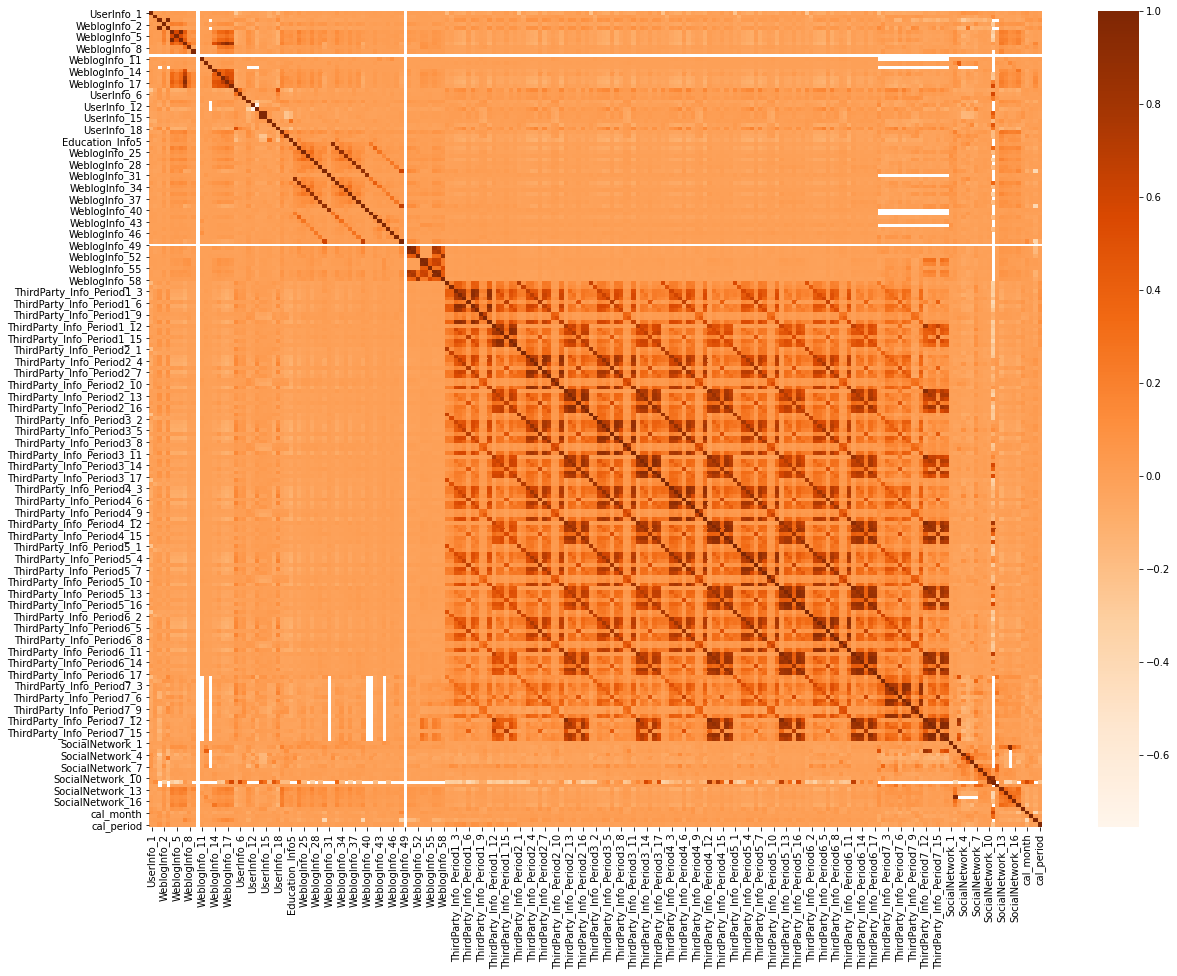

In [8]:
corr = df_train.corr()
plt.subplots(figsize=(20, 15))
sns.heatmap(corr, annot=False, vmax=1, square=False, cmap="Oranges")
plt.show()

In [9]:
# Output list of columns which has NaN for more than 95%
# Cut-off to reduce useless dimensions
col=df_train.columns
drop_list_missing=[]
for i in col:
    if df_train[i].count()/df_train.shape[0]<0.05:
        drop_list_missing.append(i)
print('Columns with too many NaN')
print(drop_list_missing)
print('\n\n\n')

# Output list of columns which keeps same value over 95%
# Cut-Off!
drop_list_const=[]
for i in col:
    if i != 'target':
        if df_train[i].value_counts().iloc[0]/df_train[i].count()>0.85:
            drop_list_const.append(i)
print('Columns with too much redundancy')
print(drop_list_const)

drop_list=list(set(drop_list_missing+drop_list_const))

#df_all = df_all.drop(drop_list,axis=1)
df_train = df_train.drop(drop_list,axis=1)
df_test = df_test.drop(drop_list,axis=1)

Columns with too many NaN
['WeblogInfo_1', 'WeblogInfo_3', 'ThirdParty_Info_Period7_1', 'ThirdParty_Info_Period7_2', 'ThirdParty_Info_Period7_3', 'ThirdParty_Info_Period7_4', 'ThirdParty_Info_Period7_5', 'ThirdParty_Info_Period7_6', 'ThirdParty_Info_Period7_7', 'ThirdParty_Info_Period7_8', 'ThirdParty_Info_Period7_9', 'ThirdParty_Info_Period7_10', 'ThirdParty_Info_Period7_11', 'ThirdParty_Info_Period7_12', 'ThirdParty_Info_Period7_13', 'ThirdParty_Info_Period7_14', 'ThirdParty_Info_Period7_15', 'ThirdParty_Info_Period7_16', 'ThirdParty_Info_Period7_17', 'SocialNetwork_3', 'SocialNetwork_4', 'SocialNetwork_5', 'SocialNetwork_6', 'SocialNetwork_7', 'SocialNetwork_11']




Columns with too much redundancy
['WeblogInfo_2', 'WeblogInfo_8', 'WeblogInfo_9', 'WeblogInfo_10', 'WeblogInfo_11', 'WeblogInfo_12', 'WeblogInfo_13', 'WeblogInfo_14', 'UserInfo_11', 'UserInfo_17', 'UserInfo_21', 'UserInfo_22_pinyin', 'UserInfo_23', 'UserInfo_24_pinyin', 'Education_Info1', 'Education_Info2', 'Education_I

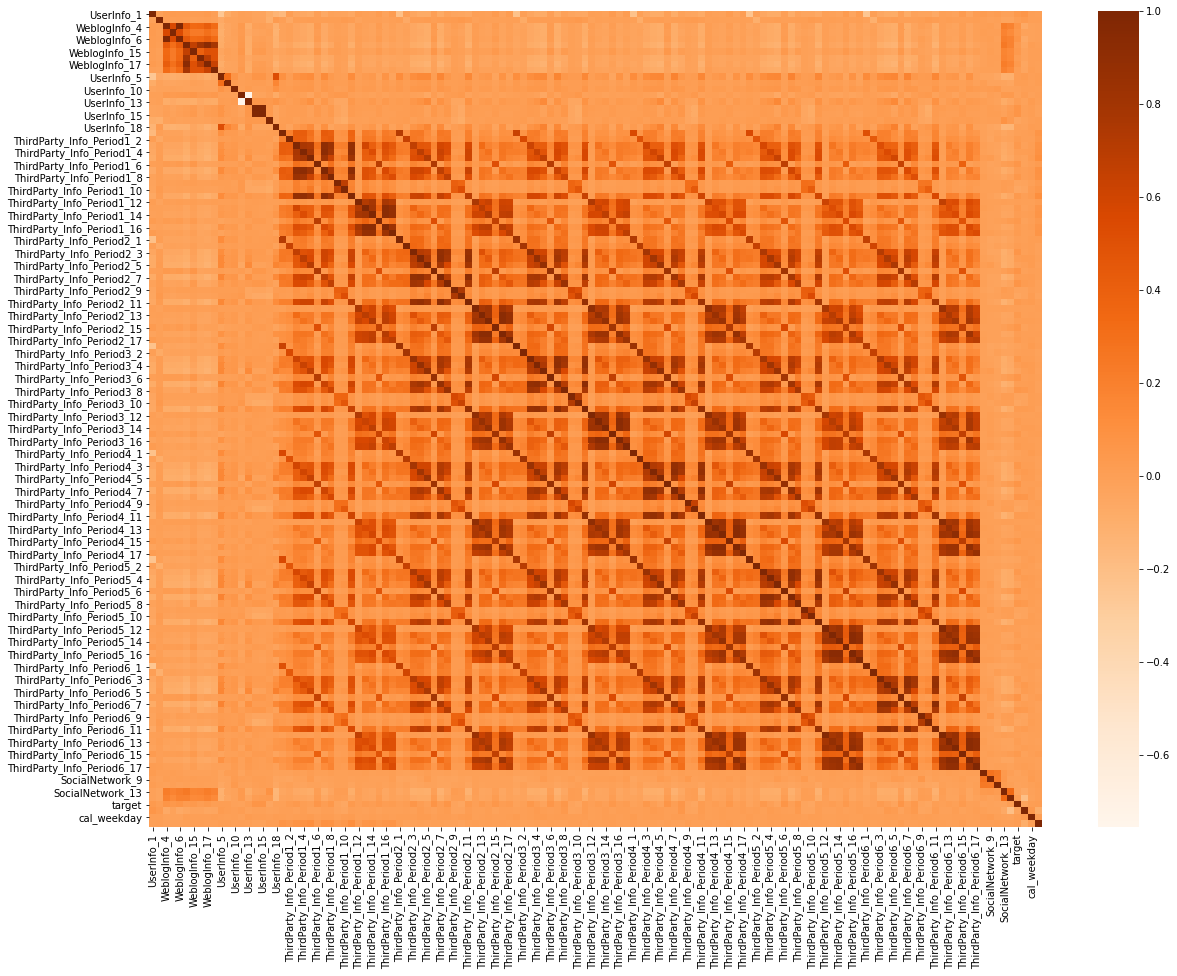

In [10]:
corr = df_train.corr()
plt.subplots(figsize=(20, 15))
sns.heatmap(corr, annot=False, vmax=1, square=False, cmap="Oranges")
plt.show()

In [11]:
columns = df_train.columns.values.tolist()  
userinfo = []  
for i in columns:
    if 'UserInfo' in i:
        userinfo.append(i)
#print(col_3rdparty)

df_train[userinfo].head()

,UserInfo_1,UserInfo_2_pinyin,UserInfo_3,UserInfo_4_pinyin,UserInfo_5,UserInfo_6,UserInfo_7_pinyin,UserInfo_8_pinyin,UserInfo_9_pinyin,UserInfo_10,UserInfo_12,UserInfo_13,UserInfo_14,UserInfo_15,UserInfo_16,UserInfo_18,UserInfo_19_pinyin,UserInfo_20_pinyin
0,1.0,zhongqing,4.0,zhongqing,2.0,2.0,zhongqing,zhongqing,zhongguoliantong,2.0,1.0,1.0,4.0,4.0,2.0,37.0,sichuan,NaN
1,3.0,xiangfan,5.0,dongzuo,2.0,2.0,guizhou,qianxinanbuyizumiaozuzizhizhouxingyishi,zhongguodianxin,0.0,0.0,1.0,4.0,4.0,2.0,32.0,hubei,xiangyangshi
2,3.0,tongren,6.0,tongren,1.0,2.0,guizhou,tongren,zhongguoyidong,0.0,NaN,NaN,3.0,3.0,1.0,24.0,guizhou,tongrendiqu
3,1.0,yuncheng,4.0,yuncheng,2.0,2.0,shanxi,yunchengshi,zhongguoyidong,0.0,NaN,NaN,5.0,5.0,1.0,34.0,shanxi,NaN
4,6.0,guangzhou,5.0,yangjiang,1.0,1.0,guangdong,yangjiang,zhongguoyidong,2.0,NaN,NaN,3.0,3.0,1.0,21.0,guangdong,yangjiangshi


In [12]:
data1_feature_kind=pd.DataFrame({'feature_kind':[i.split('_',1)[0] for i in df_train.columns],'cnt':1})
data1_feature_kind.groupby('feature_kind',as_index=False)['cnt'].count().sort_values(by='cnt')

,feature_kind,cnt
5,target,1
4,cal,3
0,SocialNetwork,5
3,WeblogInfo,11
2,UserInfo,18
1,ThirdParty,102


Text(0, 0.5, 'missing value')

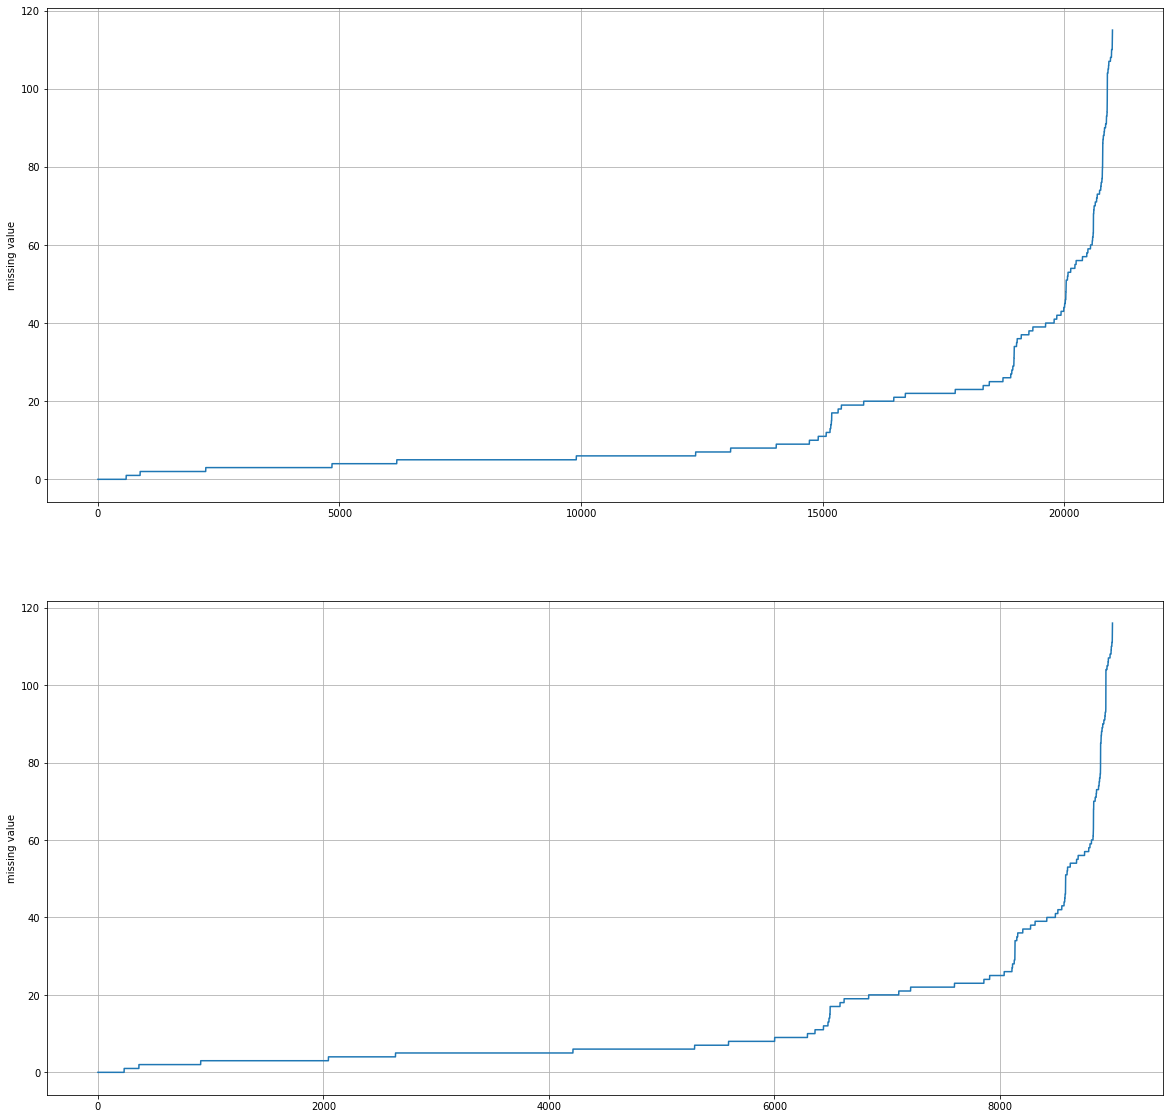

In [13]:
plt_size=(20,20)
plt.figure(figsize=plt_size)

# Record how many Nulls per row in additional column
df_train['usermissing']=df_train.isnull().sum(axis=1) 
train_list_missing_num  = sorted(list(df_train['usermissing'].values))

df_test['usermissing']=df_test.isnull().sum(axis=1) 
test_list_missing_num  = sorted(list(df_test['usermissing'].values))


plt.subplot(2,1,1) 
plt.grid()
plt.plot(range(df_train.shape[0]),train_list_missing_num)
plt.ylabel('missing value')

plt.subplot(2,1,2) 
plt.grid()
plt.plot(range(df_test.shape[0]),test_list_missing_num)
plt.ylabel('missing value')

In [14]:
df_train = df_train[~(df_train['usermissing']>80)]
#df_test = df_test[~(df_test['usermissing']>80)]

print(df_train.shape)
print(df_test.shape)

(20795, 141)
(9000, 141)


In [15]:
data1_feature_kind=pd.DataFrame({'feature_kind':[i.split('_',1)[0] for i in df_train.columns],'cnt':1})
data1_feature_kind.groupby('feature_kind',as_index=False)['cnt'].count().sort_values(by='cnt')

,feature_kind,cnt
5,target,1
6,usermissing,1
4,cal,3
0,SocialNetwork,5
3,WeblogInfo,11
2,UserInfo,18
1,ThirdParty,102


In [16]:
for i in df_train.columns:
    if df_train[i].dtype=='object':
        print (i)

category_list=[]
for i in df_train.columns:
    if df_train[i].dtype=='object':
        category_list.append(i)

df_train[category_list].describe()

UserInfo_2_pinyin
UserInfo_4_pinyin
UserInfo_7_pinyin
UserInfo_8_pinyin
UserInfo_9_pinyin
UserInfo_19_pinyin
UserInfo_20_pinyin
WeblogInfo_19
WeblogInfo_20
WeblogInfo_21


,UserInfo_2_pinyin,UserInfo_4_pinyin,UserInfo_7_pinyin,UserInfo_8_pinyin,UserInfo_9_pinyin,UserInfo_19_pinyin,UserInfo_20_pinyin,WeblogInfo_19,WeblogInfo_20,WeblogInfo_21
count,20574,20607,17874,17874,17874,20795,15849,18765,15232,18684
unique,320,321,30,621,3,30,285,7,34,4
top,shenzuo,shenzuo,guangdong,shenzuo,zhongguoyidong,guangdong,quanzhoushi,I,I5,D
freq,516,571,2692,532,11917,1686,330,15247,7748,15040


In [17]:
# Use Label Encoder to make categorical column into numberic
for i in category_list:
    lbl = preprocessing.LabelEncoder()
    df_train[i] = lbl.fit_transform(list(df_train[i].values))
    df_test[i] = lbl.fit_transform(list(df_test[i].values))

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

df_train=df_train.replace({np.nan:-1})
df_test=df_test.replace({np.nan:-1})

x_train=df_train.drop('target',axis=1) 
y_train=df_train['target']

# #from imblearn.over_sampling import SMOTE
# # Having Smote to do undersampling
# over_samples = SMOTE(random_state=12) 
# over_samples_X,over_samples_y = over_samples.fit_sample(x_train, y_train)
# print(y_train.value_counts()/len(y_train))
# print(pd.Series(over_samples_y).value_counts()/len(over_samples_y))
# x_train = over_samples_X
# y_train = over_samples_y
# from collections import Counter
# from imblearn.combine import SMOTETomek
# kos = SMOTETomek(random_state=12)  # 综合采样
# x_kos, y_kos = kos.fit_sample(x_train, y_train)
# x_train = x_kos
# y_train = y_kos
# print('综合采样后，训练集 y_kos 中的分类情况：{}'.format(Counter(y_kos)))

x_test=df_test.drop('target',axis=1) 
y_test=df_test['target']
#x_train.head()
x_test.head()

def plot_auc(y, prediction,y_train, y_prediction_train):
    fpr, tpr, threshold = metrics.roc_curve(y, prediction)
    _fpr, _tpr, _threshold = metrics.roc_curve(y_train, y_prediction_train)
    roc_auc = metrics.auc(fpr, tpr)
    roc_auc2 = metrics.auc(_fpr, _tpr)
    plt.title('Validation ROC')
    plt.plot(fpr, tpr, 'b', label = 'x_test AUC = %0.3f' % roc_auc)
    plt.plot(_fpr, _tpr, 'r', label = 'x_train AUC = %0.3f' % roc_auc2)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate') 
    
def plot_confusion_matrix(y_test,result):
    plt.figure()
    plt.figure(figsize=(6,6))
    cm = confusion_matrix(y_test, result)
    labels = ['Positive','Negative']
    sns.heatmap(cm, xticklabels = labels, yticklabels = labels, annot = True, fmt='d',cmap='Oranges',vmin=0.2)
    plt.ylabel('True Class')
    plt.xlabel('Predicted Class')
    print('confusion matrix')
    plt.show()

def best_threshold(y, prediction):
    fpr, tpr, threshold = metrics.roc_curve(y, prediction)
    #print(fpr.shape)
    #print(tpr.shape)
    #print(threshold.shape)
    z = tpr - fpr
    youden_index = np.argmax(z) 
    best = threshold[youden_index]
    return best

def best_thre_roi(y, prediction):
    precision, recall, thresholds = metrics.precision_recall_curve(y, prediction)
    roi = 0
    th = 0
    for index in range(len(thresholds)):
        result = np.where(prediction > thresholds[index], 1, 0)
        cm = confusion_matrix(y_test, result)
        _roi = cm[0,0]*0.1 - cm[1,0]
        if (_roi>roi):
            #print(str(cm[0,0]) + '  '+str(cm[1,0]))
            roi = _roi
            th = thresholds[index]
    return th

def kfold_predict(clf, n_splits):
    kf = KFold(n_splits = n_splits, random_state=42, shuffle=True)
    kf.get_n_splits(x_train) # returns the number of splitting iterations in the cross-validator
    
    predes_train = []
    predes_test = []
    
    for train_index, test_index in kf.split(x_train):
        x_fit, x_val = x_train.iloc[train_index], x_train.iloc[test_index]
        y_fit, y_val = y_train.iloc[train_index], y_train.iloc[test_index]
    
        model = clf.fit(x_fit, y_fit)
    
        pred_test = model.predict_proba(x_test)[:,1]
        pred_train = model.predict_proba(x_train)[:,1]
        predes_train.append(pred_train)
        predes_test.append(pred_test)
    
    prediction_test = np.mean(predes_test, axis = 0) 
    prediction_train = np.mean(predes_train, axis = 0)
    return prediction_test, prediction_train

# 模型2 决策树

Accuracy Score is 0.9208888888888889


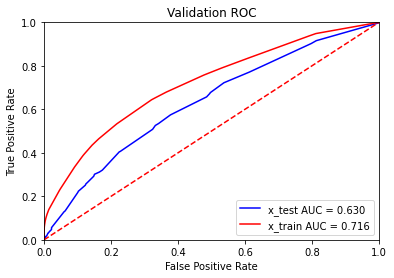

In [19]:
from sklearn import tree

# The decision tree classifier.
clf = tree.DecisionTreeClassifier(max_depth = 6)
# Training the Decision Tree
model = clf.fit(x_train, y_train)

prediction = model.predict_proba(x_test)[:,1]
result = model.predict(x_test)
print('Accuracy Score is',accuracy_score(y_test, result))
plot_auc(y_test,prediction, y_train, model.predict_proba(x_train)[:,1])
plt.show()

confusion matrix


<Figure size 432x288 with 0 Axes>

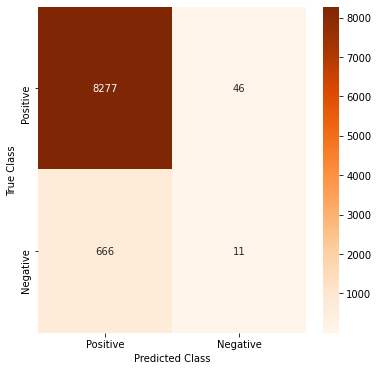

In [20]:
plot_confusion_matrix(y_test,result)

0.08888888888888889
confusion matrix


<Figure size 432x288 with 0 Axes>

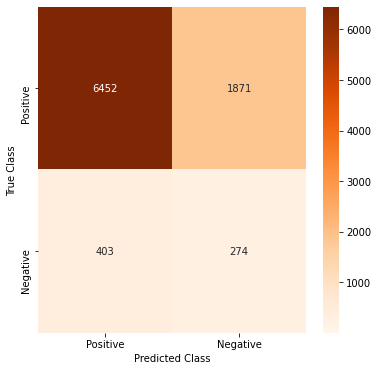

In [21]:
threshold = best_thre_roi(y_test, prediction)
print(threshold)
result = np.where(prediction > threshold, 1, 0)
plot_confusion_matrix(y_test,result)

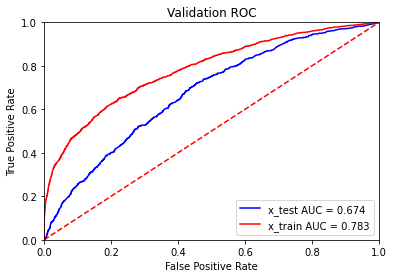

In [27]:
clf = tree.DecisionTreeClassifier(max_depth=6)
prediction_test, prediction_train = kfold_predict(clf=clf, n_splits = 10)

plot_auc(y_test,prediction_test, y_train, prediction_train)
plt.show()

0.0794188700962076
confusion matrix


<Figure size 432x288 with 0 Axes>

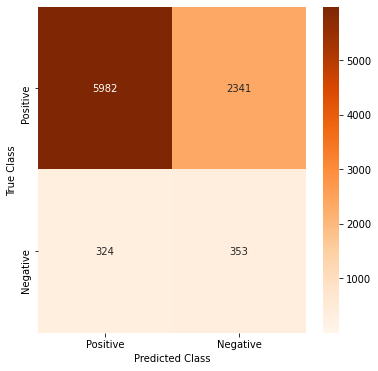

In [28]:
threshold = best_thre_roi(y_test, prediction_test)
print(threshold)
result = np.where(prediction_test > threshold, 1, 0)
plot_confusion_matrix(y_test,result)

# 模型3 随机森林

Accuracy Score is 0.9247777777777778


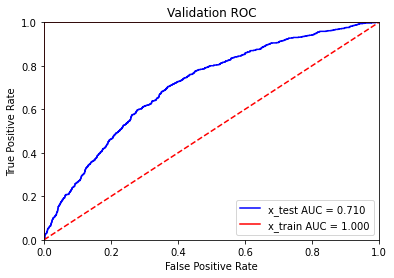

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# parameters = {
#     'max_depth': [35],
#     'max_features':['auto'],
#     'criterion': ['entropy'],
#     'n_estimators': [1700,],
#     #'min_sample_leaf':[30,50,70,90]
# }

# gsearch = GridSearchCV(rf, param_grid=parameters, scoring='roc_auc', 
#                        cv=5,verbose=1, n_jobs = -1)
# gsearch.fit(train_x, train_y)

# print("Best score: %0.3f" % gsearch.best_score_)
# print("Best parameters set:")
# best_parameters = gsearch.best_estimator_.get_params()
# for param_name in sorted(parameters.keys()):
#     print("\t%s: %r" % (param_name, best_parameters[param_name]))

rf = RandomForestClassifier(random_state=14, max_depth=15, max_features='auto', 
                           criterion='entropy',n_estimators=500)
model_rf = rf.fit(x_train, y_train)

prediction = model_rf.predict_proba(x_test)[:,1]
result = model_rf.predict(x_test)
print('Accuracy Score is',accuracy_score(y_test, result))
plot_auc(y_test,prediction, y_train, model_rf.predict_proba(x_train)[:,1])
plt.show()

confusion matrix


<Figure size 432x288 with 0 Axes>

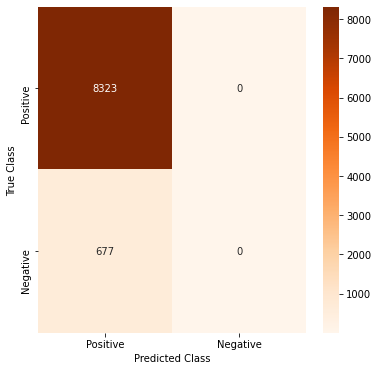

In [30]:
plot_confusion_matrix(y_test,result)

0.09057432288072335
confusion matrix


<Figure size 432x288 with 0 Axes>

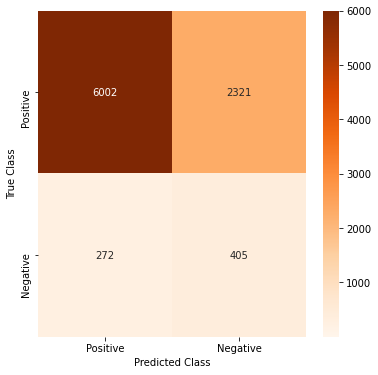

In [31]:
threshold = best_thre_roi(y_test, prediction)
print(threshold)
result = np.where(prediction > threshold, 1, 0)
plot_confusion_matrix(y_test,result)

In [33]:
# clf = rf
# prediction_test, prediction_train = kfold_predict(clf=clf, n_splits = 10)

# plot_auc(y_test,prediction_test, y_train, prediction_train)
# plt.show()

In [ ]:
# threshold = best_thre_roi(y_test, prediction_test)
# print(threshold)
# result = np.where(prediction_test > threshold, 1, 0)
# plot_confusion_matrix(y_test,result)

# 模型4 LGBM

[1]	valid_0's auc: 0.648561
Training until validation scores don't improve for 20 rounds
[2]	valid_0's auc: 0.665209
[3]	valid_0's auc: 0.672925
[4]	valid_0's auc: 0.678041
[5]	valid_0's auc: 0.681004
[6]	valid_0's auc: 0.683193
[7]	valid_0's auc: 0.689043
[8]	valid_0's auc: 0.689914
[9]	valid_0's auc: 0.694371
[10]	valid_0's auc: 0.698103
[11]	valid_0's auc: 0.701262
[12]	valid_0's auc: 0.702315
[13]	valid_0's auc: 0.704242
[14]	valid_0's auc: 0.704181
[15]	valid_0's auc: 0.706577
[16]	valid_0's auc: 0.709661
[17]	valid_0's auc: 0.710319
[18]	valid_0's auc: 0.710181
[19]	valid_0's auc: 0.712047
[20]	valid_0's auc: 0.71394
[21]	valid_0's auc: 0.714627
[22]	valid_0's auc: 0.715877
[23]	valid_0's auc: 0.715751
[24]	valid_0's auc: 0.715866
[25]	valid_0's auc: 0.717152
[26]	valid_0's auc: 0.716697
[27]	valid_0's auc: 0.718224
[28]	valid_0's auc: 0.719499
[29]	valid_0's auc: 0.720244
[30]	valid_0's auc: 0.720872
[31]	valid_0's auc: 0.721698
[32]	valid_0's auc: 0.721726
[33]	valid_0's auc: 0

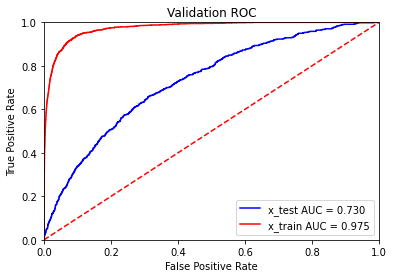

In [34]:
import lightgbm as lgb 
from sklearn.model_selection import train_test_split

#train_x, valid_x, train_y, valid_y = train_test_split(x_train, y_train, test_size=0.35, random_state=42)

lgb_train = lgb.Dataset(x_train,y_train)
lgb_test = lgb.Dataset(x_test,y_test,reference=lgb_train)
lgb_full_params = {
    'boosting_type':'gbdt',
    'objective':'binary',
    'max_depth':18,
    'num_leaves':96,
    'bagging_fraction':0.98,
    'feature_fraction':0.6,
    'learning_rate':0.1,
    'verbose': -1,
    'metric': 'auc',
    'lambda_l1': 1,
    'lambda_l2':25,
    'cat_smooth':1
}
model_lgb = lgb.train(train_set=lgb_train,
                      early_stopping_rounds=20,
                      num_boost_round=900,
                      params=lgb_full_params,
                      #verbose_eval=False,
                      valid_sets=lgb_test)

prediction=model_lgb.predict(x_test)
result = np.where(prediction > 0.5, 1, 0)
print('Accuracy Score is',accuracy_score(y_test, result))
plot_auc(y_test,prediction,y_train,model_lgb.predict(x_train))
plt.show()


# train = lgb.Dataset(train_x, train_y)
# valid = lgb.Dataset(valid_x, valid_y, reference=train)

# parameters = {
#     'max_depth': [18],
#     'learning_rate': [0.1],
#     'feature_fraction': [0.6],
#     'bagging_fraction': [0.98],
#     'lambda_l1': [1],
#     'lambda_l2': [25],
#     'num_leaves': [96]
# }

# gbm = lgb.LGBMClassifier(boosting_type='gbdt',
#                          objective = 'binary',
#                          metric = 'auc',
#                          verbose = 0,
#                          bagging_freq= 8,)

# gsearch = GridSearchCV(gbm, param_grid=parameters, scoring='roc_auc', 
#                        cv=3,verbose=1, n_jobs = -1)
# gsearch.fit(train_x, train_y)

# print("Best score: %0.3f" % gsearch.best_score_)
# print("Best parameters set:")
# best_parameters = gsearch.best_estimator_.get_params()
# for param_name in sorted(parameters.keys()):
#     print("\t%s: %r" % (param_name, best_parameters[param_name]))

confusion matrix


<Figure size 432x288 with 0 Axes>

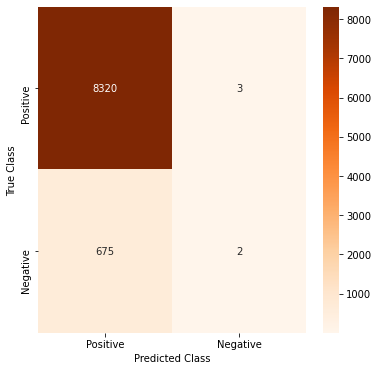

In [35]:
plot_confusion_matrix(y_test,result)

0.0811341381201098
confusion matrix


<Figure size 432x288 with 0 Axes>

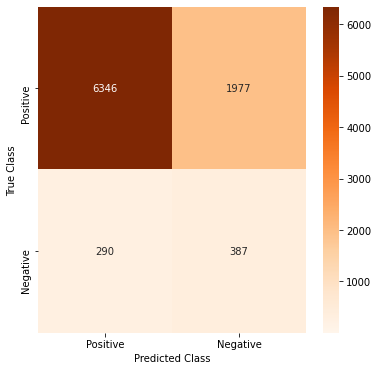

In [36]:
threshold = best_thre_roi(y_test, prediction)
print(threshold)
result = np.where(prediction > threshold, 1, 0)
plot_confusion_matrix(y_test,result)

In [42]:
def kfold_predict_lgb(n_splits):
    kf = KFold(n_splits = n_splits, random_state=42, shuffle=True)
    kf.get_n_splits(x_train) # returns the number of splitting iterations in the cross-validator
    
    predes_train = []
    predes_test = []
    
    for train_index, test_index in kf.split(x_train):
        x_fit, x_val = x_train.iloc[train_index], x_train.iloc[test_index]
        y_fit, y_val = y_train.iloc[train_index], y_train.iloc[test_index]
        
        lgb_train = lgb.Dataset(x_fit,y_fit)
        lgb_test = lgb.Dataset(x_test,y_test,reference=lgb_train)
        
        model = lgb.train(train_set=lgb_train,
                          early_stopping_rounds=20,
                          num_boost_round=900,
                          params=lgb_full_params,
                          #verbose_eval=False,
                          valid_sets=lgb_test)
    
        pred_test = model.predict(x_test)
        pred_train = model.predict(x_train)
        predes_train.append(pred_train)
        predes_test.append(pred_test)
    
    
    
    prediction_test = np.mean(predes_test, axis = 0) 
    prediction_train = np.mean(predes_train, axis = 0)
    return prediction_test, prediction_train

[1]	valid_0's auc: 0.641789
Training until validation scores don't improve for 20 rounds
[2]	valid_0's auc: 0.66623
[3]	valid_0's auc: 0.675742
[4]	valid_0's auc: 0.684639
[5]	valid_0's auc: 0.686487
[6]	valid_0's auc: 0.693066
[7]	valid_0's auc: 0.698927
[8]	valid_0's auc: 0.701208
[9]	valid_0's auc: 0.703288
[10]	valid_0's auc: 0.705765
[11]	valid_0's auc: 0.706542
[12]	valid_0's auc: 0.708247
[13]	valid_0's auc: 0.707888
[14]	valid_0's auc: 0.708113
[15]	valid_0's auc: 0.708629
[16]	valid_0's auc: 0.710906
[17]	valid_0's auc: 0.711743
[18]	valid_0's auc: 0.711848
[19]	valid_0's auc: 0.713551
[20]	valid_0's auc: 0.714109
[21]	valid_0's auc: 0.715125
[22]	valid_0's auc: 0.716288
[23]	valid_0's auc: 0.717657
[24]	valid_0's auc: 0.717443
[25]	valid_0's auc: 0.7183
[26]	valid_0's auc: 0.719083
[27]	valid_0's auc: 0.71999
[28]	valid_0's auc: 0.720494
[29]	valid_0's auc: 0.721127
[30]	valid_0's auc: 0.721723
[31]	valid_0's auc: 0.721946
[32]	valid_0's auc: 0.72221
[33]	valid_0's auc: 0.722

[11]	valid_0's auc: 0.698755
[12]	valid_0's auc: 0.703929
[13]	valid_0's auc: 0.704102
[14]	valid_0's auc: 0.707054
[15]	valid_0's auc: 0.706892
[16]	valid_0's auc: 0.708878
[17]	valid_0's auc: 0.709937
[18]	valid_0's auc: 0.708754
[19]	valid_0's auc: 0.711061
[20]	valid_0's auc: 0.712464
[21]	valid_0's auc: 0.71261
[22]	valid_0's auc: 0.713694
[23]	valid_0's auc: 0.713482
[24]	valid_0's auc: 0.714059
[25]	valid_0's auc: 0.715439
[26]	valid_0's auc: 0.716186
[27]	valid_0's auc: 0.715983
[28]	valid_0's auc: 0.717208
[29]	valid_0's auc: 0.717689
[30]	valid_0's auc: 0.718372
[31]	valid_0's auc: 0.72121
[32]	valid_0's auc: 0.72211
[33]	valid_0's auc: 0.723224
[34]	valid_0's auc: 0.723786
[35]	valid_0's auc: 0.724437
[36]	valid_0's auc: 0.724414
[37]	valid_0's auc: 0.725116
[38]	valid_0's auc: 0.72592
[39]	valid_0's auc: 0.726326
[40]	valid_0's auc: 0.726174
[41]	valid_0's auc: 0.727199
[42]	valid_0's auc: 0.727576
[43]	valid_0's auc: 0.727982
[44]	valid_0's auc: 0.728312
[45]	valid_0's auc

[41]	valid_0's auc: 0.729474
[42]	valid_0's auc: 0.729694
[43]	valid_0's auc: 0.730234
[44]	valid_0's auc: 0.730849
[45]	valid_0's auc: 0.731175
[46]	valid_0's auc: 0.730184
[47]	valid_0's auc: 0.730484
[48]	valid_0's auc: 0.730414
[49]	valid_0's auc: 0.729974
[50]	valid_0's auc: 0.73045
[51]	valid_0's auc: 0.731101
[52]	valid_0's auc: 0.731616
[53]	valid_0's auc: 0.731998
[54]	valid_0's auc: 0.732251
[55]	valid_0's auc: 0.733261
[56]	valid_0's auc: 0.733223
[57]	valid_0's auc: 0.7332
[58]	valid_0's auc: 0.733683
[59]	valid_0's auc: 0.733977
[60]	valid_0's auc: 0.734021
[61]	valid_0's auc: 0.734184
[62]	valid_0's auc: 0.734478
[63]	valid_0's auc: 0.734565
[64]	valid_0's auc: 0.734485
[65]	valid_0's auc: 0.734895
[66]	valid_0's auc: 0.735137
[67]	valid_0's auc: 0.734692
[68]	valid_0's auc: 0.734582
[69]	valid_0's auc: 0.734478
[70]	valid_0's auc: 0.734768
[71]	valid_0's auc: 0.734715
[72]	valid_0's auc: 0.734781
[73]	valid_0's auc: 0.734493
[74]	valid_0's auc: 0.734373
[75]	valid_0's au

[23]	valid_0's auc: 0.720392
[24]	valid_0's auc: 0.72117
[25]	valid_0's auc: 0.722738
[26]	valid_0's auc: 0.722469
[27]	valid_0's auc: 0.72329
[28]	valid_0's auc: 0.723882
[29]	valid_0's auc: 0.725046
[30]	valid_0's auc: 0.725231
[31]	valid_0's auc: 0.72591
[32]	valid_0's auc: 0.725602
[33]	valid_0's auc: 0.725447
[34]	valid_0's auc: 0.725483
[35]	valid_0's auc: 0.726335
[36]	valid_0's auc: 0.726828
[37]	valid_0's auc: 0.727613
[38]	valid_0's auc: 0.728178
[39]	valid_0's auc: 0.729125
[40]	valid_0's auc: 0.729013
[41]	valid_0's auc: 0.729111
[42]	valid_0's auc: 0.729501
[43]	valid_0's auc: 0.729541
[44]	valid_0's auc: 0.729884
[45]	valid_0's auc: 0.730571
[46]	valid_0's auc: 0.731385
[47]	valid_0's auc: 0.731975
[48]	valid_0's auc: 0.732016
[49]	valid_0's auc: 0.732549
[50]	valid_0's auc: 0.73357
[51]	valid_0's auc: 0.734103
[52]	valid_0's auc: 0.733726
[53]	valid_0's auc: 0.733321
[54]	valid_0's auc: 0.733966
[55]	valid_0's auc: 0.734068
[56]	valid_0's auc: 0.733108
[57]	valid_0's auc

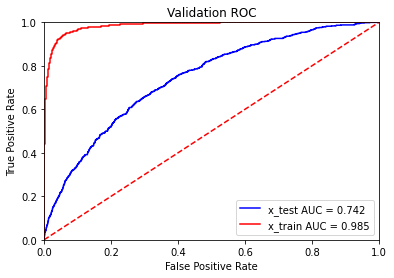

In [43]:
# clf = lgb
prediction_test, prediction_train = kfold_predict_lgb(n_splits = 10)

plot_auc(y_test,prediction_test, y_train, prediction_train)
plt.show()

0.07234926375320128
confusion matrix


<Figure size 432x288 with 0 Axes>

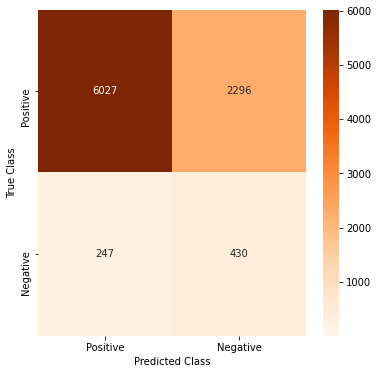

In [44]:
threshold = best_thre_roi(y_test, prediction_test)
print(threshold)
result = np.where(prediction_test > threshold, 1, 0)
plot_confusion_matrix(y_test,result)

# 模型5 XGBoost

[18:02:01] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { colsample_btree, scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Accuracy Score is 0.8377777777777777
[[7289 1034]
 [ 426  251]]


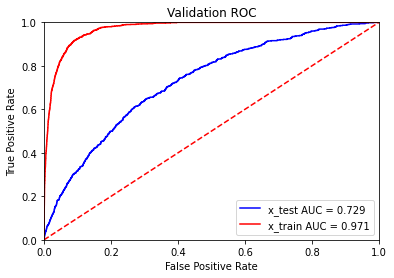

In [46]:
from xgboost import XGBClassifier

#train_x, valid_x, train_y, valid_y = train_test_split(x_train, y_train, test_size=0.25, random_state=42)

model_xgb = XGBClassifier(learning_rate=0.1,
                      n_estimators=300,         # 树的个数--1000棵树建立xgboost
                      max_depth=6,               # 树的深度
                      min_child_weight = 1,      # 叶子节点最小权重
                      gamma=0.,                  # 惩罚项中叶子结点个数前的参数
                      subsample=0.8,             # 随机选择80%样本建立决策树
                      colsample_btree=0.8,       # 随机选择80%特征建立决策树
                      objective='rank:pairwise', # 指定损失函数
                      scale_pos_weight=1,        # 解决样本个数不平衡的问题
                      random_state=27            # 随机数
                     )

model_xgb.fit(x_train,y_train,
          eval_set = [(x_test,y_test)],
          eval_metric = "auc",
          early_stopping_rounds = 10,
          verbose = False)

prediction = model_xgb.predict_proba(x_test)[:,1]
result = model_xgb.predict(x_test)
print('Accuracy Score is',accuracy_score(y_test, result))
print(confusion_matrix(y_test, result))
plot_auc(y_test,prediction,y_train,model_xgb.predict_proba(x_train)[:,1])
plt.show()

confusion matrix


<Figure size 432x288 with 0 Axes>

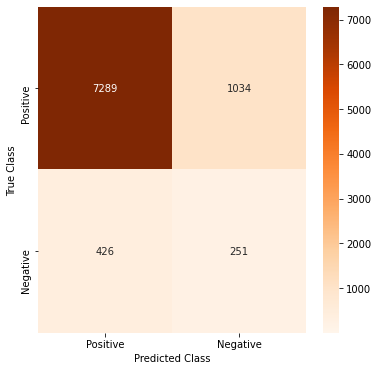

In [47]:
plot_confusion_matrix(y_test,result)

0.057303995
confusion matrix


<Figure size 432x288 with 0 Axes>

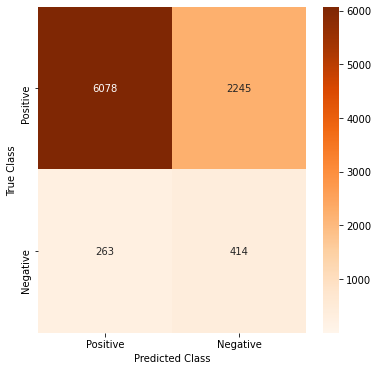

In [48]:
threshold = best_thre_roi(y_test, prediction)
print(threshold)
result = np.where(prediction > threshold, 1, 0)
plot_confusion_matrix(y_test,result)

In [53]:
def kfold_predict_xgb(n_splits):
    kf = KFold(n_splits = n_splits, random_state=42, shuffle=True)
    kf.get_n_splits(x_train) # returns the number of splitting iterations in the cross-validator
    
    predes_train = []
    predes_test = []
    
    for train_index, test_index in kf.split(x_train):
        x_fit, x_val = x_train.iloc[train_index], x_train.iloc[test_index]
        y_fit, y_val = y_train.iloc[train_index], y_train.iloc[test_index]
        
        lgb_train = lgb.Dataset(x_fit,y_fit)
        lgb_test = lgb.Dataset(x_test,y_test,reference=lgb_train)
        
        model = model_xgb.fit(x_fit,y_fit,
                              eval_set = [(x_test,y_test)],
                              eval_metric = "auc",
                              early_stopping_rounds = 10,
                              verbose = False)

        #prediction = model_xgb.predict_proba(x_test)[:,1]
        pred_test = model_xgb.predict_proba(x_test)[:,1]
        pred_train = model_xgb.predict_proba(x_train)[:,1]
        predes_train.append(pred_train)
        predes_test.append(pred_test)
    
    
    
    prediction_test = np.mean(predes_test, axis = 0) 
    prediction_train = np.mean(predes_train, axis = 0)
    return prediction_test, prediction_train

[18:08:29] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { colsample_btree, scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:08:35] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { colsample_btree, scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:08:42] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { colsample_btree, scale_pos_weight } might not be used.

  This

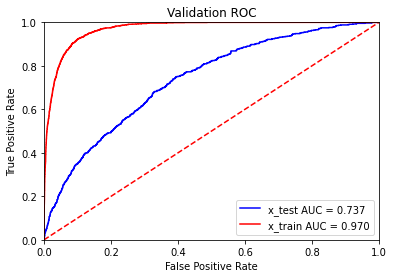

In [54]:
prediction_test, prediction_train = kfold_predict_xgb(n_splits = 10)

plot_auc(y_test,prediction_test, y_train, prediction_train)
plt.show()

-0.10920589
confusion matrix


<Figure size 432x288 with 0 Axes>

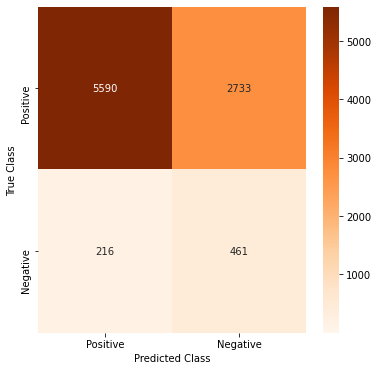

In [55]:
threshold = best_thre_roi(y_test, prediction_test)
print(threshold)
result = np.where(prediction_test > threshold, 1, 0)
plot_confusion_matrix(y_test,result)

# 混合模型

In [56]:
train_x,val_x,train_y,val_y = train_test_split(x_train,y_train,test_size=0.3)

#Starking
#第一层
train_rf_pred = model_rf.predict_proba(train_x)[:,1]
train_lgb_pred = model_lgb.predict(train_x)
train_xgb_pred = model_xgb.predict_proba(train_x)[:,1]

Strak_X_train = pd.DataFrame()
Strak_X_train['Method_1'] = train_rf_pred
Strak_X_train['Method_2'] = train_lgb_pred
Strak_X_train['Method_3'] = train_xgb_pred

Strak_X_val = pd.DataFrame()
Strak_X_val['Method_1'] = model_rf.predict_proba(val_x)[:,1]
Strak_X_val['Method_2'] = model_lgb.predict(val_x)
Strak_X_val['Method_3'] = model_xgb.predict_proba(val_x)[:,1]

Strak_X_test = pd.DataFrame()
Strak_X_test['Method_1'] = model_rf.predict_proba(x_test)[:,1]
Strak_X_test['Method_2'] = model_lgb.predict(x_test)
Strak_X_test['Method_3'] = model_xgb.predict_proba(x_test)[:,1]

IndexError: list index out of range

In [57]:
logit = LogisticRegression(random_state=0, solver='liblinear')
model_lr_Stacking = logit.fit(Strak_X_train, train_y)

#预测集
prediction = model_lr_Stacking.predict_proba(Strak_X_test)[:,1]
result = model_lr_Stacking.predict(Strak_X_test)
print('Accuracy Score is',accuracy_score(y_test, result))
print(y_test.shape)
print(result.shape)
print(train_y.shape)
print(model_lr_Stacking.predict_proba(Strak_X_train).shape)
#plot_auc(y_test,prediction,y_train,model_xgb.predict_proba(x_train)[:,1])
plot_auc(y_test,prediction,train_y , model_lr_Stacking.predict_proba(Strak_X_train)[:,1])
plt.show()

NameError: name 'LogisticRegression' is not defined

0.019019499730078576
confusion matrix


<Figure size 432x288 with 0 Axes>

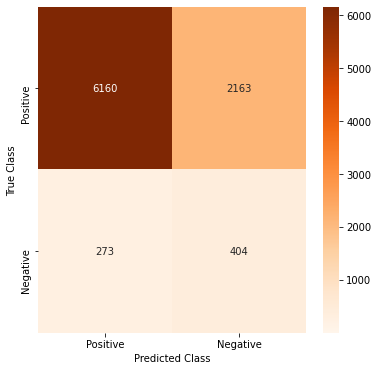

In [157]:
threshold = best_thre_roi(y_test, prediction)
print(threshold)
result = np.where(prediction > threshold, 1, 0)
plot_confusion_matrix(y_test,result)

confusion matrix


<Figure size 432x288 with 0 Axes>

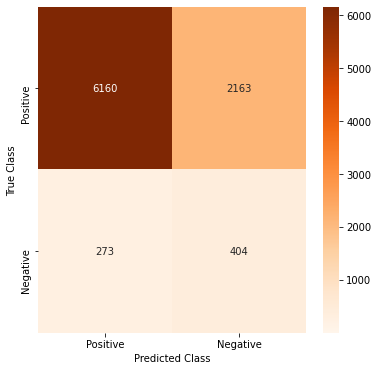

In [160]:
model_reg = linear_model.LinearRegression()
model_reg.fit(Strak_X_train,train_y)

model_reg.predict(Strak_X_test)

plot_confusion_matrix(y_test,result)

In [169]:
best_rf, best_lgb, best_xgb = 0.09352941176470589, 0.07807599035886784, -0.2601667

Voting_X_Test = pd.DataFrame()
Voting_X_Test['rf'] = np.where(model_rf.predict_proba(x_test)[:,1] > best_rf, 1, 0)
Voting_X_Test['lgb'] = np.where(model_lgb.predict(x_test) > best_lgb, 1, 0)
Voting_X_Test['xgb'] = np.where(model_xgb.predict_proba(x_test)[:,1] > best_xgb, 1, 0)

Voting_X_Test['result_1'] = np.where((Voting_X_Test['rf'] + Voting_X_Test['lgb'] + Voting_X_Test['xgb']) >= 1, 1, 0)
Voting_X_Test['result_2'] = np.where((Voting_X_Test['rf'] + Voting_X_Test['lgb'] + Voting_X_Test['xgb']) >= 2, 1, 0)
Voting_X_Test['result_3'] = np.where((Voting_X_Test['rf'] + Voting_X_Test['lgb'] + Voting_X_Test['xgb']) == 3, 1, 0)

In [170]:
print(Voting_X_Test)

      rf  lgb  xgb  result_1  result_2  result_3
0      0    0    0         0         0         0
1      0    0    1         1         0         0
2      0    0    0         0         0         0
3      1    1    1         1         1         1
4      1    0    0         1         0         0
5      1    0    0         1         0         0
6      0    0    0         0         0         0
7      0    0    0         0         0         0
8      0    1    1         1         1         0
9      0    0    0         0         0         0
10     1    0    1         1         1         0
11     0    0    1         1         0         0
12     1    1    1         1         1         1
13     1    1    1         1         1         1
14     0    0    0         0         0         0
15     0    0    0         0         0         0
16     0    0    0         0         0         0
17     1    1    1         1         1         1
18     1    0    0         1         0         0
19     0    0    0  

confusion matrix


<Figure size 432x288 with 0 Axes>

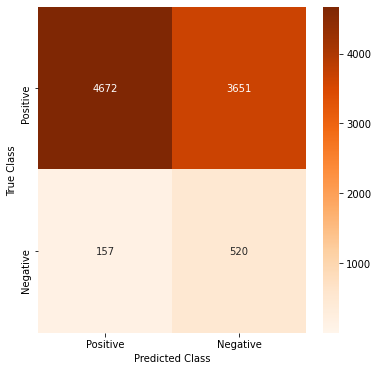

In [171]:
plot_confusion_matrix(y_test,Voting_X_Test['result_1'])

confusion matrix


<Figure size 432x288 with 0 Axes>

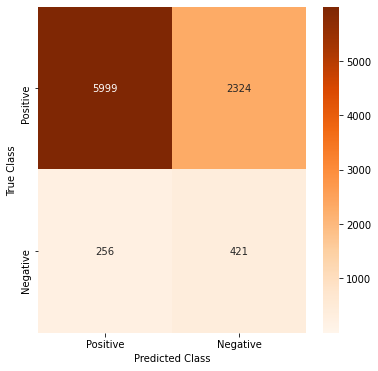

In [172]:
plot_confusion_matrix(y_test,Voting_X_Test['result_2'])

confusion matrix


<Figure size 432x288 with 0 Axes>

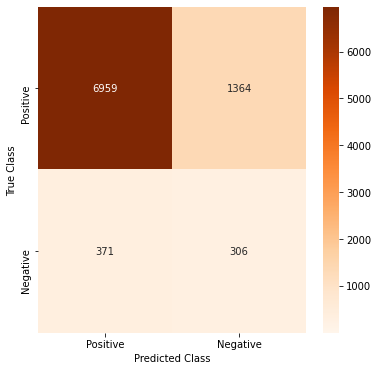

In [173]:
plot_confusion_matrix(y_test,Voting_X_Test['result_3'])